In [ ]:
# Crosstab Analysis
import pandas as pd

# Load data
df = pd.read_csv('../lab-eda-univariate/raw_data/amz_uk_price_prediction_dataset.csv')

# Crosstab
crosstab = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')  # Normalized for proportion
crosstab['BestSeller_Proportion'] = crosstab[True]
crosstab_sorted = crosstab.sort_values('BestSeller_Proportion', ascending=False)
crosstab_sorted.head(10)


isBestSeller,False,True,BestSeller_Proportion
category,,,
Grocery,0.941865,0.058135,0.058135
Smart Home Security & Lighting,0.942308,0.057692,0.057692
Health & Personal Care,0.942314,0.057686,0.057686
Mobile Phone Accessories,0.957529,0.042471,0.042471
Power & Hand Tools,0.964661,0.035339,0.035339
"Billiard, Snooker & Pool",0.967871,0.032129,0.032129
Pet Supplies,0.969800,0.030200,0.030200
Home Brewing & Wine Making,0.971545,0.028455,0.028455
Mirrors,0.972000,0.028000,0.028000


In [ ]:
#Chi-Square Test and Cramér's V
from scipy.stats import chi2_contingency
import numpy as np

# Chi-square
contingency_table = pd.crosstab(df['category'], df['isBestSeller'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Cramér's V
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min(k - 1, r - 1))

print(f"Chi2: {chi2}, p-value: {p}")
print(f"Cramér's V: {cramers_v}")


Chi2: 36540.20270061387, p-value: 0.0
Cramér's V: 0.1222829439760564


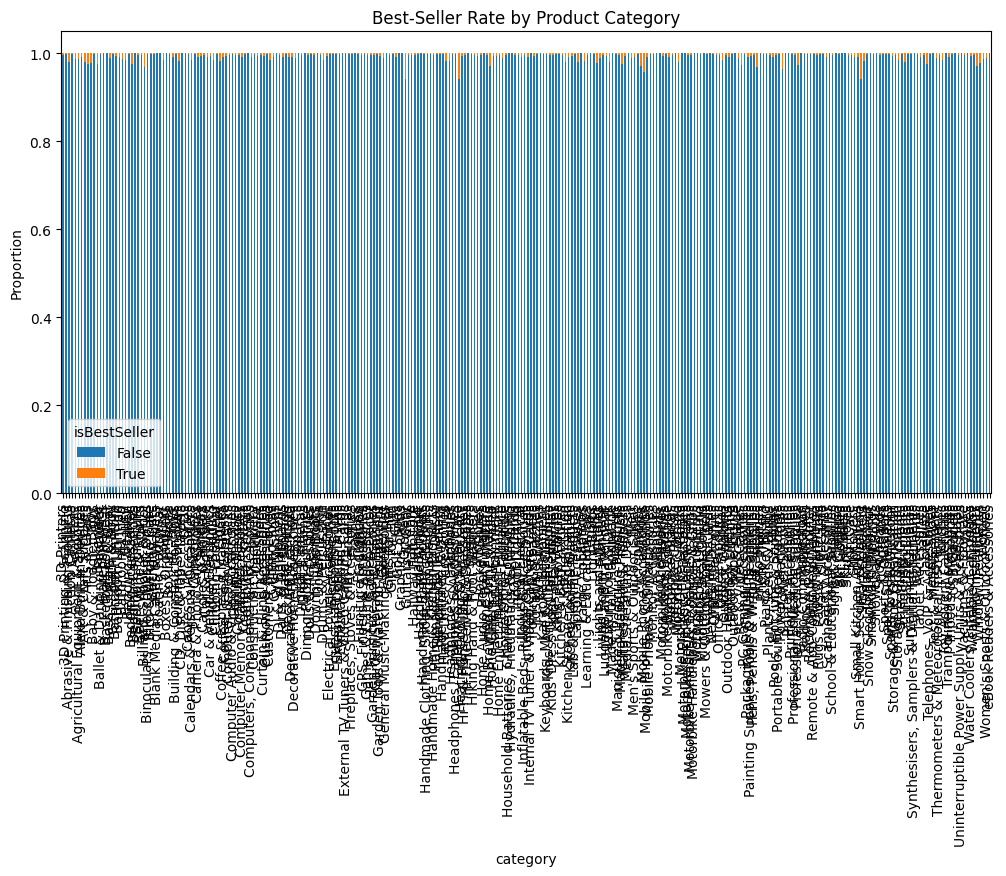

In [ ]:
#Visualization: Stacked Bar

import matplotlib.pyplot as plt

contingency_table_pct = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')
contingency_table_pct.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Best-Seller Rate by Product Category')
plt.ylabel('Proportion')
plt.show()


In [6]:
#Remove Outliers (IQR method)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


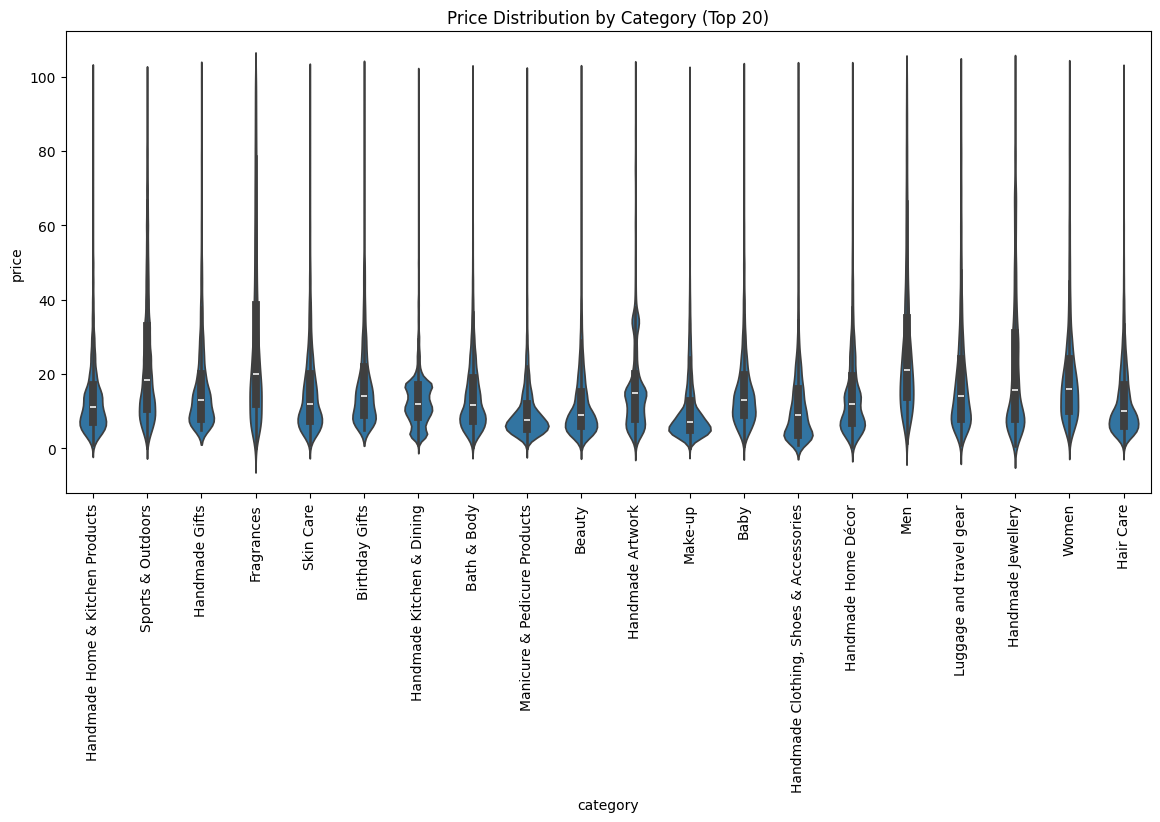

In [7]:
#Violin Plot: Price by Category
import seaborn as sns

top_20_categories = df_clean['category'].value_counts().head(20).index
filtered = df_clean[df_clean['category'].isin(top_20_categories)]

plt.figure(figsize=(14,6))
sns.violinplot(data=filtered, x='category', y='price')
plt.xticks(rotation=90)
plt.title('Price Distribution by Category (Top 20)')
plt.show()


<Axes: title={'center': 'Average Price by Category'}, xlabel='category'>

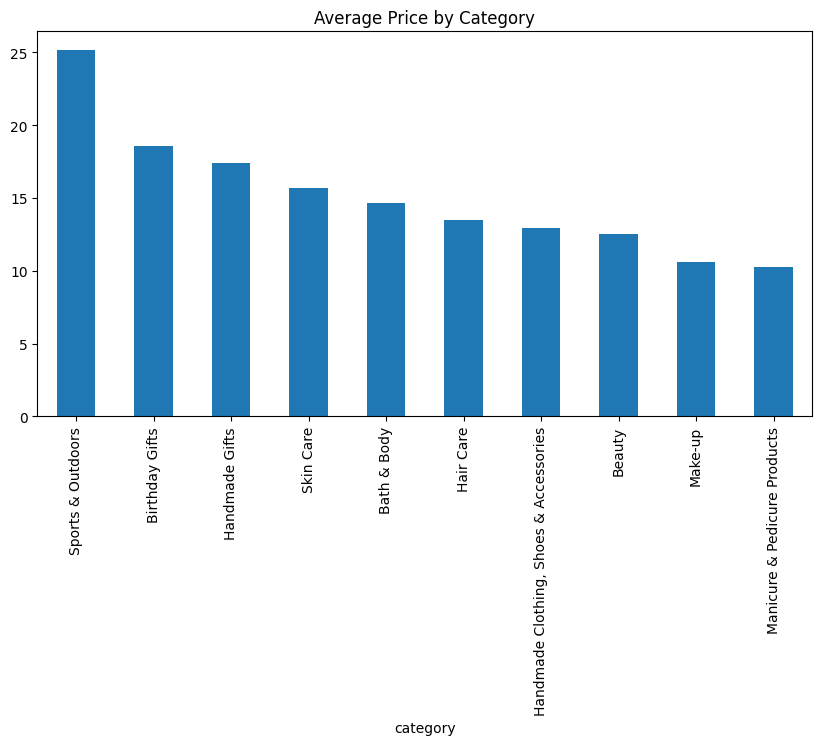

In [8]:
#Bar Chart: Average Price for Top 10 Categories
avg_price = df_clean.groupby('category')['price'].mean()
top_10 = df_clean['category'].value_counts().head(10).index
avg_price[top_10].sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='Average Price by Category')


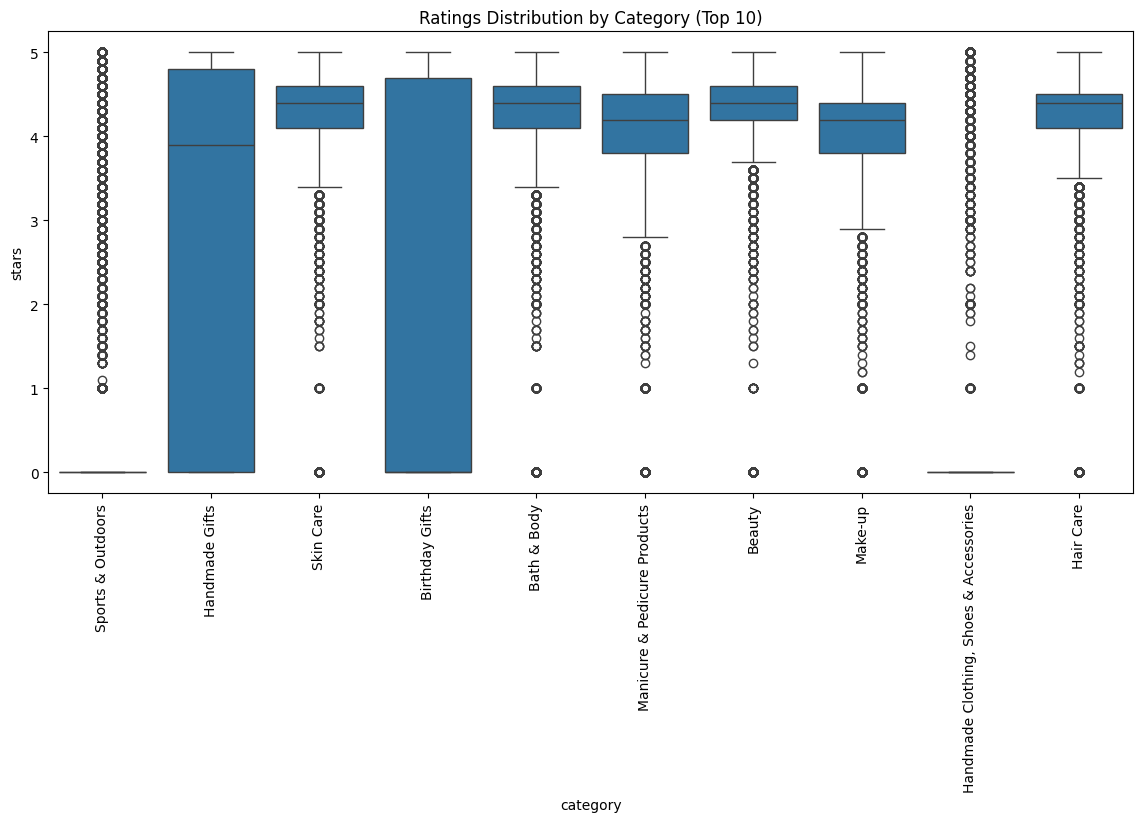

In [9]:
#Box Plot: Ratings by Category
top_10 = df_clean['category'].value_counts().head(10).index
filtered = df_clean[df_clean['category'].isin(top_10)]

plt.figure(figsize=(14,6))
sns.boxplot(data=filtered, x='category', y='stars')
plt.xticks(rotation=90)
plt.title('Ratings Distribution by Category (Top 10)')
plt.show()


In [10]:
#Correlation
correlation = df_clean[['price', 'stars']].corr()
print(correlation)


          price     stars
price  1.000000 -0.077673
stars -0.077673  1.000000


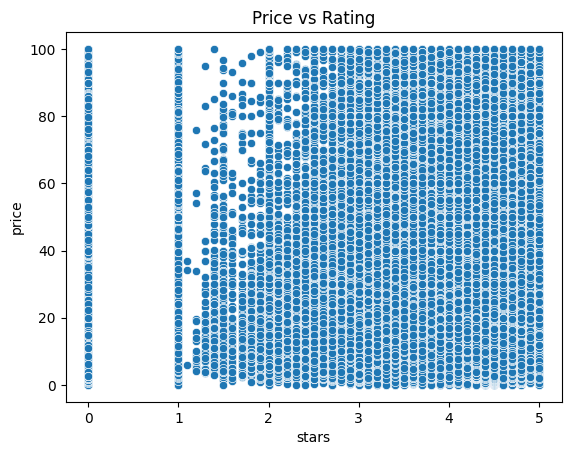

In [11]:
#Scatter Plot
sns.scatterplot(data=df_clean, x='stars', y='price')
plt.title('Price vs Rating')
plt.show()


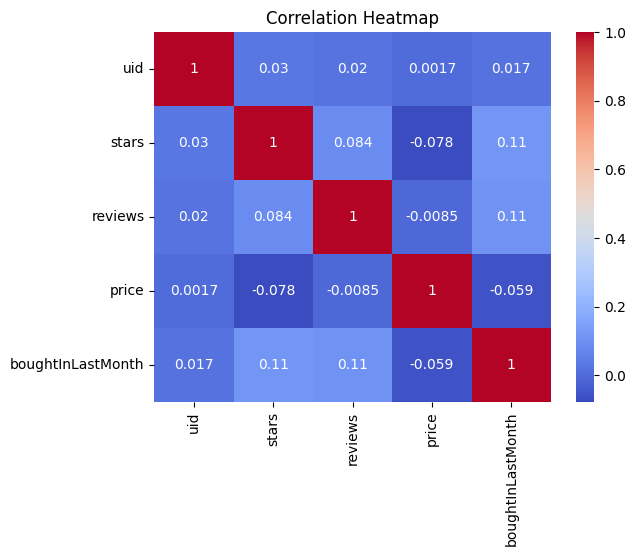

In [14]:
#Correlation Heatmap
# Select only numeric columns
numeric_df = df_clean.select_dtypes(include='number')

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



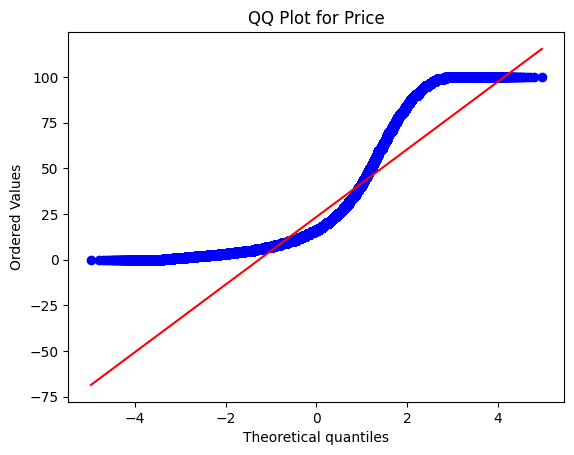

In [13]:
#QQ Plot
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df_clean['price'], dist="norm", plot=plt)
plt.title("QQ Plot for Price")
plt.show()
